Lets create a fun neural network to classify images. But as before, giving it a cool name:

# Expression Quest

CREATED BY: NARENDRA JADE

I have created a Conventional Neural Network(CNN) to classify human images into the three categories of emotions - happy, sad and angry.

In [1]:
%matplotlib inline #Magic Command
%config InlineBackend.figure_format = 'retina' #Magic Command

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import OrderedDict
from torchvision import datasets, transforms, models

The commands which start with % are called magic commands. These commands are not a part of Python language but are provided by Jupyter Notebook to perform special tasks. 
The first magic command ensures that whenever an image or graph is an output it would print it right below the cell. Otherwise, by default a new window is opened showing the output
The second magic command specifies the image format(JPG,PNG,JPEG, etc.). In this case its retina.

In [2]:
# Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder("C:\\Users\\Admin\\Desktop\\Final ML Project Database\\Train", transform=train_transforms) #Creating a dataset
test_data = datasets.ImageFolder("C:\\Users\\Admin\\Desktop\\Final ML Project Database\\Test", transform=test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8)

We apply transformations to the training set images to ensure data augmentation(increase the size of the database by applying transformations), prevent reguralization and to ensure that the ML model recognizes an image despite its orientation.

DataLoader function creates batches within the dataset and shuffle is used to shuffle the order of the images during training of the data. This is important because it prevents our program from learning the sequence of our data which can lead to overfitting. 

In [3]:
num_classes = len(train_data.class_to_idx)#Specifies the number of classes in the training data
num_classes

3

My data has 3 classes - happy, sad, angry

In [4]:
train_data.class_to_idx

{'Angry': 0, 'Happy': 1, 'Sad': 2}

In [5]:
model = models.resnet18(pretrained=True)
model.fc

C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Linear(in_features=512, out_features=1000, bias=True)

Resnet is an image classifier(ML model) present in the torchvision. To train the ML model, we are using the concept of Transfer Learning. 
Transfer Learning involves training the ML model on top of a pretrained model.We will tailor the existing model as per our needs.

In [6]:
for param in model.parameters():
    param.requires_grad = False #Freezing the model paramters
#Defining new layers for the CNN
fc = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(512, 500)), #Takes 512 input features, 500 output
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 3)), #Converts the 500 features to output size of 3
                          ('output', nn.LogSoftmax(dim=1)) #Used to calculate class scores
                          ]))
    
model.fc = fc #Replacing the fc layer of the resnet model with the one defined above

The FC layer is responsible for calculating class scores. The class scores represent the probability of the image to belong to any of the class. The image belongs to the class with maximum class score.

In [7]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Can be trained on either CPU or GPU

model = models.resnet18(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
from collections import OrderedDict
model.fc = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(512, 400)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(400, 3)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

criterion = nn.NLLLoss() #Calculating the loss

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.fc.parameters(), lr=0.003) #Using the Adam Optimizer to update the paramters of FC layer

model.to(device); #Moving the model to the device selected above

In [9]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
epochs = 10 #Number of cycles(One cycle is forward pass + backpropogation)
steps = 0 
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in train_loader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            
            confusion_matrix = torch.zeros(num_classes, num_classes)
            with torch.no_grad():
                for inputs, labels in test_loader: 
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
                    for t, p in zip(labels.view(-1), top_class.view(-1)):
                            confusion_matrix[t.long(), p.long()] += 1
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            print(confusion_matrix)
            running_loss = 0
            model.train()

Epoch 1/10.. Train loss: 2.546.. Test loss: 1.638.. Test accuracy: 0.329
tensor([[71.,  0.,  1.],
        [72.,  0.,  0.],
        [72.,  0.,  0.]])
Epoch 1/10.. Train loss: 1.856.. Test loss: 1.416.. Test accuracy: 0.333
tensor([[ 0., 72.,  0.],
        [ 0., 72.,  0.],
        [ 0., 72.,  0.]])
Epoch 1/10.. Train loss: 1.222.. Test loss: 1.126.. Test accuracy: 0.301
tensor([[ 0., 39., 33.],
        [ 0., 21., 51.],
        [ 0., 28., 44.]])
Epoch 1/10.. Train loss: 1.126.. Test loss: 1.145.. Test accuracy: 0.333
tensor([[ 0.,  0., 72.],
        [ 0.,  0., 72.],
        [ 0.,  0., 72.]])
Epoch 1/10.. Train loss: 1.162.. Test loss: 1.108.. Test accuracy: 0.319
tensor([[21., 36., 15.],
        [ 8., 25., 39.],
        [26., 23., 23.]])
Epoch 1/10.. Train loss: 1.091.. Test loss: 1.112.. Test accuracy: 0.338
tensor([[20., 52.,  0.],
        [16., 52.,  4.],
        [42., 29.,  1.]])
Epoch 1/10.. Train loss: 1.099.. Test loss: 1.112.. Test accuracy: 0.324
tensor([[ 4., 63.,  5.],
        

C:\Users\Admin\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10.. Train loss: 1.073.. Test loss: 1.121.. Test accuracy: 0.333
tensor([[ 0., 72.,  0.],
        [ 0., 72.,  0.],
        [ 1., 71.,  0.]])
Epoch 1/10.. Train loss: 1.120.. Test loss: 1.107.. Test accuracy: 0.329
tensor([[ 0., 72.,  0.],
        [ 1., 71.,  0.],
        [ 8., 64.,  0.]])
Epoch 1/10.. Train loss: 1.102.. Test loss: 1.108.. Test accuracy: 0.319
tensor([[63.,  9.,  0.],
        [66.,  6.,  0.],
        [72.,  0.,  0.]])
Epoch 1/10.. Train loss: 1.106.. Test loss: 1.107.. Test accuracy: 0.264
tensor([[18.,  0., 54.],
        [ 8.,  1., 63.],
        [34.,  0., 38.]])
Epoch 1/10.. Train loss: 1.129.. Test loss: 1.094.. Test accuracy: 0.426
tensor([[ 0., 32., 40.],
        [ 0., 20., 52.],
        [ 0.,  0., 72.]])
Epoch 1/10.. Train loss: 1.110.. Test loss: 1.103.. Test accuracy: 0.329
tensor([[ 0., 72.,  0.],
        [ 0., 71.,  1.],
        [ 3., 69.,  0.]])
Epoch 1/10.. Train loss: 1.082.. Test loss: 1.112.. Test accuracy: 0.329
tensor([[ 0., 72.,  0.],
        

Epoch 2/10.. Train loss: 1.079.. Test loss: 1.260.. Test accuracy: 0.356
tensor([[ 2., 50., 20.],
        [ 1., 20., 51.],
        [11.,  6., 55.]])
Epoch 2/10.. Train loss: 1.000.. Test loss: 1.246.. Test accuracy: 0.245
tensor([[ 4., 64.,  4.],
        [ 9., 32., 31.],
        [43., 12., 17.]])
Epoch 2/10.. Train loss: 1.047.. Test loss: 1.216.. Test accuracy: 0.227
tensor([[24., 48.,  0.],
        [36., 23., 13.],
        [67.,  3.,  2.]])
Epoch 2/10.. Train loss: 1.073.. Test loss: 1.226.. Test accuracy: 0.250
tensor([[19., 47.,  6.],
        [18., 21., 33.],
        [54.,  4., 14.]])
Epoch 3/10.. Train loss: 1.074.. Test loss: 1.230.. Test accuracy: 0.245
tensor([[23., 43.,  6.],
        [20., 20., 32.],
        [58.,  4., 10.]])
Epoch 3/10.. Train loss: 1.079.. Test loss: 1.218.. Test accuracy: 0.250
tensor([[10., 58.,  4.],
        [14., 35., 23.],
        [53., 10.,  9.]])
Epoch 3/10.. Train loss: 0.991.. Test loss: 1.252.. Test accuracy: 0.306
tensor([[ 2., 65.,  5.],
        

Epoch 4/10.. Train loss: 1.159.. Test loss: 1.377.. Test accuracy: 0.231
tensor([[ 3., 54., 15.],
        [ 7., 24., 41.],
        [43.,  6., 23.]])
Epoch 4/10.. Train loss: 1.036.. Test loss: 1.382.. Test accuracy: 0.264
tensor([[ 5., 67.,  0.],
        [16., 48.,  8.],
        [54., 14.,  4.]])
Epoch 4/10.. Train loss: 1.086.. Test loss: 1.343.. Test accuracy: 0.222
tensor([[15., 55.,  2.],
        [28., 31., 13.],
        [62.,  8.,  2.]])
Epoch 4/10.. Train loss: 0.987.. Test loss: 1.353.. Test accuracy: 0.190
tensor([[18., 46.,  8.],
        [28., 17., 27.],
        [64.,  2.,  6.]])
Epoch 4/10.. Train loss: 0.891.. Test loss: 1.432.. Test accuracy: 0.181
tensor([[28., 28., 16.],
        [30.,  5., 37.],
        [66.,  0.,  6.]])
Epoch 4/10.. Train loss: 1.070.. Test loss: 1.418.. Test accuracy: 0.167
tensor([[16., 32., 24.],
        [21.,  6., 45.],
        [58.,  0., 14.]])
Epoch 4/10.. Train loss: 0.972.. Test loss: 1.379.. Test accuracy: 0.222
tensor([[ 4., 50., 18.],
        

Epoch 5/10.. Train loss: 1.016.. Test loss: 1.400.. Test accuracy: 0.245
tensor([[10., 59.,  3.],
        [16., 32., 24.],
        [55.,  6., 11.]])
Epoch 5/10.. Train loss: 0.950.. Test loss: 1.389.. Test accuracy: 0.222
tensor([[24., 46.,  2.],
        [36., 21., 15.],
        [66.,  3.,  3.]])
Epoch 5/10.. Train loss: 1.028.. Test loss: 1.375.. Test accuracy: 0.231
tensor([[19., 46.,  7.],
        [23., 18., 31.],
        [58.,  1., 13.]])
Epoch 5/10.. Train loss: 0.871.. Test loss: 1.384.. Test accuracy: 0.241
tensor([[ 9., 58.,  5.],
        [14., 33., 25.],
        [52., 10., 10.]])
Epoch 5/10.. Train loss: 1.028.. Test loss: 1.456.. Test accuracy: 0.278
tensor([[ 4., 67.,  1.],
        [ 8., 51., 13.],
        [50., 17.,  5.]])
Epoch 5/10.. Train loss: 1.038.. Test loss: 1.364.. Test accuracy: 0.241
tensor([[10., 59.,  3.],
        [17., 34., 21.],
        [56.,  8.,  8.]])
Epoch 5/10.. Train loss: 1.065.. Test loss: 1.319.. Test accuracy: 0.259
tensor([[14., 49.,  9.],
        

Epoch 7/10.. Train loss: 0.851.. Test loss: 1.508.. Test accuracy: 0.213
tensor([[21., 34., 17.],
        [15.,  9., 48.],
        [54.,  2., 16.]])
Epoch 7/10.. Train loss: 0.832.. Test loss: 1.540.. Test accuracy: 0.213
tensor([[22., 34., 16.],
        [19.,  9., 44.],
        [56.,  1., 15.]])
Epoch 7/10.. Train loss: 0.954.. Test loss: 1.560.. Test accuracy: 0.250
tensor([[22., 45.,  5.],
        [27., 25., 20.],
        [58.,  7.,  7.]])
Epoch 7/10.. Train loss: 0.966.. Test loss: 1.635.. Test accuracy: 0.250
tensor([[16., 56.,  0.],
        [25., 35., 12.],
        [58., 11.,  3.]])
Epoch 7/10.. Train loss: 0.971.. Test loss: 1.614.. Test accuracy: 0.231
tensor([[11., 58.,  3.],
        [19., 32., 21.],
        [53., 12.,  7.]])
Epoch 7/10.. Train loss: 1.006.. Test loss: 1.619.. Test accuracy: 0.185
tensor([[ 7., 53., 12.],
        [11., 17., 44.],
        [49.,  7., 16.]])
Epoch 7/10.. Train loss: 0.947.. Test loss: 1.617.. Test accuracy: 0.176
tensor([[14., 38., 20.],
        

Epoch 8/10.. Train loss: 0.913.. Test loss: 1.491.. Test accuracy: 0.213
tensor([[ 8., 46., 18.],
        [13., 17., 42.],
        [47.,  4., 21.]])
Epoch 8/10.. Train loss: 0.989.. Test loss: 1.507.. Test accuracy: 0.227
tensor([[ 5., 58.,  9.],
        [10., 28., 34.],
        [45., 11., 16.]])
Epoch 8/10.. Train loss: 1.023.. Test loss: 1.493.. Test accuracy: 0.227
tensor([[19., 46.,  7.],
        [22., 19., 31.],
        [60.,  1., 11.]])
Epoch 8/10.. Train loss: 1.041.. Test loss: 1.489.. Test accuracy: 0.199
tensor([[15., 42., 15.],
        [14., 13., 45.],
        [55.,  2., 15.]])
Epoch 8/10.. Train loss: 0.902.. Test loss: 1.491.. Test accuracy: 0.194
tensor([[ 6., 42., 24.],
        [ 8., 11., 53.],
        [44.,  3., 25.]])
Epoch 8/10.. Train loss: 0.947.. Test loss: 1.483.. Test accuracy: 0.218
tensor([[16., 43., 13.],
        [13., 15., 44.],
        [52.,  4., 16.]])
Epoch 8/10.. Train loss: 1.057.. Test loss: 1.521.. Test accuracy: 0.190
tensor([[22., 33., 17.],
        

Epoch 10/10.. Train loss: 0.969.. Test loss: 1.472.. Test accuracy: 0.194
tensor([[ 8., 57.,  7.],
        [14., 26., 32.],
        [55.,  9.,  8.]])
Epoch 10/10.. Train loss: 0.852.. Test loss: 1.513.. Test accuracy: 0.194
tensor([[ 3., 61.,  8.],
        [ 6., 28., 38.],
        [49., 12., 11.]])
Epoch 10/10.. Train loss: 1.037.. Test loss: 1.514.. Test accuracy: 0.218
tensor([[ 4., 60.,  8.],
        [ 5., 28., 39.],
        [47., 10., 15.]])
Epoch 10/10.. Train loss: 1.015.. Test loss: 1.478.. Test accuracy: 0.213
tensor([[ 5., 60.,  7.],
        [ 9., 31., 32.],
        [50., 12., 10.]])
Epoch 10/10.. Train loss: 0.887.. Test loss: 1.443.. Test accuracy: 0.213
tensor([[12., 51.,  9.],
        [14., 20., 38.],
        [53.,  5., 14.]])
Epoch 10/10.. Train loss: 0.874.. Test loss: 1.495.. Test accuracy: 0.218
tensor([[ 7., 49., 16.],
        [ 7., 15., 50.],
        [41.,  6., 25.]])
Epoch 10/10.. Train loss: 0.856.. Test loss: 1.539.. Test accuracy: 0.227
tensor([[ 6., 48., 18.],
 

In [11]:
torch.save(model.state_dict(), 'res18_10.pth') #Used to save the model

We have finished training our model. Now onto testing in. Whatever images we will use henceforth will be external images.

In [12]:
def load_ckpt(ckpt_path):
    ckpt = torch.load(ckpt_path)

    model = models.resnet18(pretrained=True)
    model.fc = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(512, 400)),
                      ('relu', nn.ReLU()),
                      ('fc2', nn.Linear(400, 3)),
                      ('output', nn.LogSoftmax(dim=1))
                      ]))

    model.load_state_dict(ckpt, strict=False)

    return model

In [13]:
SAVE_PATH = 'res18_10.pth'
model = load_ckpt(SAVE_PATH) #laoding the saved model

In [14]:
import PIL
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an torch Tensor
    ''' 
    im = PIL.Image.open(image)
    return test_transforms(im) #Applying the transformations given above

In [15]:
def predict(image_path, model):
    # Predict the class of an image using a trained deep learning model.
    model.eval()
    img_pros = process_image(image_path) #Applies test transforms
    img_pros = img_pros.view(1,3,224,224) #Converts the image into a tensor of batch size 1, 3 color channels(RGB), height and width 224 pixels each
    with torch.no_grad(): 
        output = model(img_pros)
    return output

touch.no_grad() disables gradient(error) computation. As we are testing the model, we dont need to know the errors made by the model. 

In [16]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

Angry


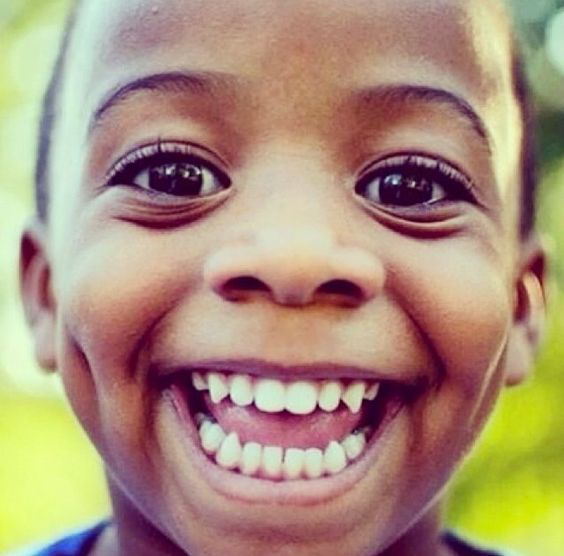

In [17]:
img_path = 'C:\\Users\\Admin\\Desktop\\images.jpg'
log_ps = predict(img_path, model)
cls_score = int(torch.argmax(torch.exp(log_ps))) #Calculates the maximum class scores out of the three and assigns it to cls_score.
if cls_score == 0:
    print("Angry")
elif cls_score == 1:
    print("Happy")
else:
    print("Sad")
PIL.Image.open(img_path)

In [18]:
torch.exp(predict(img_path, model)) #The three class scores

tensor([[0.4777, 0.4619, 0.0605]])